In [3]:
from NCorrFP_scheme.demo import demo
from NCorrFP_scheme.NCorrFP import NCorrFP, sample_from_area
import pandas as pd
import numpy as np

In [4]:
# original data
data = "NCorrFP_scheme/test/test_data/synthetic_300_3_continuous.csv"
dataset = pd.read_csv(data)
correlated_attributes = ['X', 'Y']
correlation_original = dataset['X'].corr(dataset['Y'])
primary_key_name = ['Id']
dataset.head(5)

,Id,X,Y,Z
0,0,51,42,29
1,1,46,29,22
2,2,60,44,28
3,3,68,52,39
4,4,48,35,25


In [5]:
secret_key = 101
recipient_id = 4
gamma = 1
fp_bit_length = 16
k = 10

In [6]:
scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
scheme = demo(scheme)  # wrapper for demo; does the embedding and detection

In [7]:
scheme.eval(data, correlated_attributes)

Start the demo NCorr fingerprint insertion algorithm...
	gamma: 1
	correlated attributes: ['X', 'Y']

Generated fingerprint for recipient 4: 0100000001100100

Generated fingerprint for recipient 4: 0100000001100100
Inserting the fingerprint...

Training balltrees in: 0.0056 sec.
Fingerprint inserted.
Runtime: 0 ms.
Start demo NCorr fingerprint detection algorithm ...
	gamma: 1
	correlated attributes: ['X', 'Y']
Training balltrees in: 0.005 sec.
Fingerprint detected: 0100000001100100
Fingerprint belongs to Recipient 4
Runtime: 0 ms.
DONE!


In [6]:
# fingerprint = [0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0]

In [7]:
#scheme.show_embedding_iteration(0)

Detecting from record at idx: 299
Detecting from attribute: Y
      Id   X   Y   Z
299  299  58  49  35
Fingerpritned value: 49
----------------------------------------------------------
Obtaining neighbourhood....
Target values:[39, 49, 56, 49, 30, 49, 42, 31, 37, 55, 37, 35, 42]
----------------------------------------------------------

--> Observing the distribution of target attribute Y below...
Mark bit (where in distribution falls the target value?): 0 (i.e. tails of distribution)
Mask bit (from PRNG): 0
Fingerprint bit index (from PRNG): 8
Fingerprint bit value (mark bit xor mask bit): 0

Fingerprint bit CORRECT :)


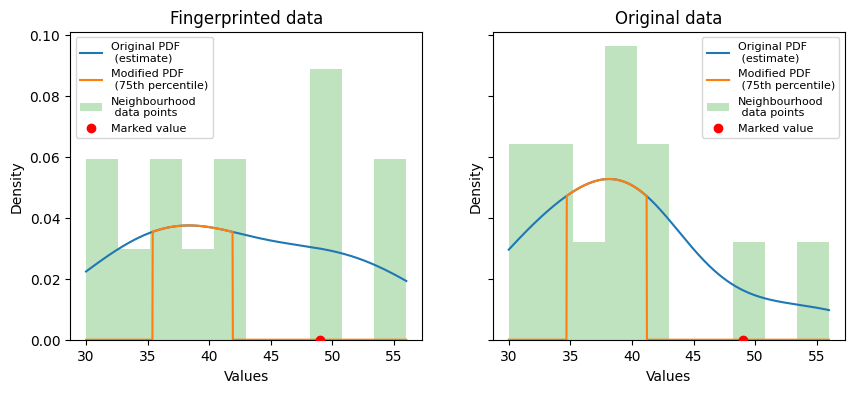

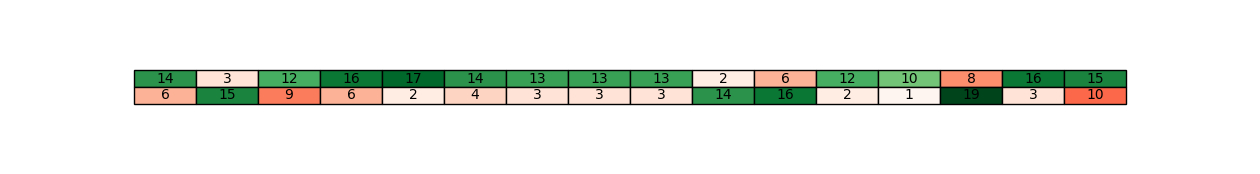

Table: fingerprint count updates after this iteration (iteration -1). Each column is one fingerprint bit position (e.g. 16-bit --> 16 columns), and each row represents votes for either 0 or 1 being the value of that bit. The final decision is made at the end af the detection algorithm according to majority vote.


In [8]:
scheme.show_detection_iteration(-1)

In [9]:
# # find all iterations with errors in detection 
# errors = []
# for iteration in range(len(det_iter_log)):
#     if det_iter_log[iteration]['fingerprint_bit'] != fingerprint[det_iter_log[iteration]['fingerprint_idx']]:
#         errors.append(iteration)


Detecting from attribute: Y
Fingerprinted value: 39
Mark bit (where in distribution falls the target value?): 1 (i.e. in densest area)

Detecting from attribute: Z
Fingerprinted value: 38
Mark bit (where in distribution falls the target value?): 1 (i.e. in densest area)


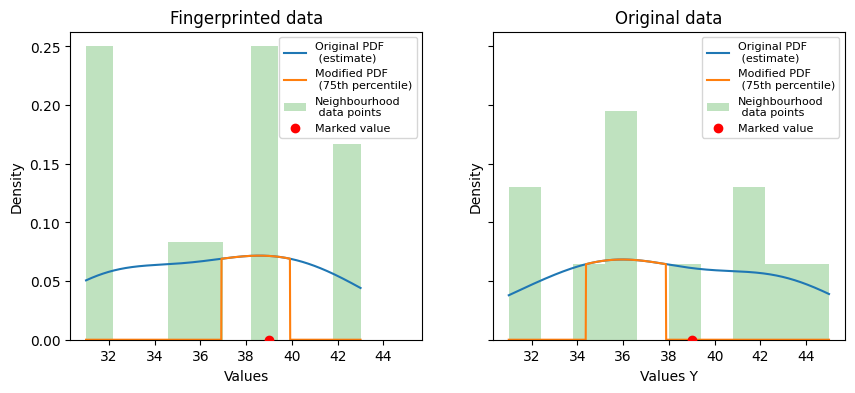

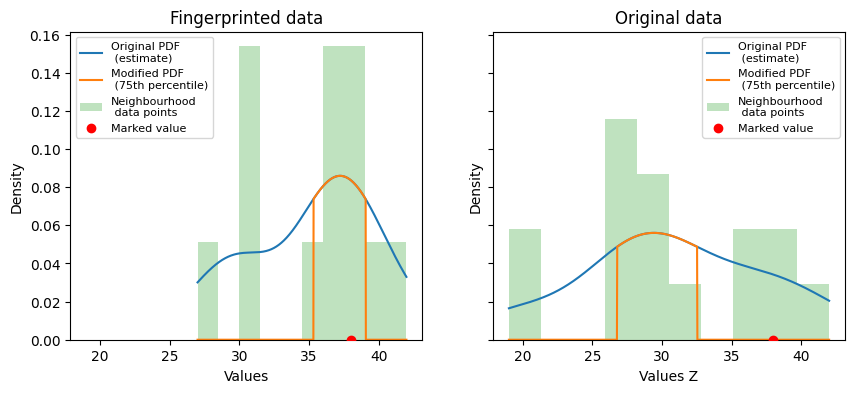

In [10]:
scheme.show_wrong_detections(batch=2)

In [11]:
scheme.total_errors()

71

In [12]:
scheme.error_rate()

0.23666666666666666

In [13]:
# error rate as a function of size of neighbourhood/total size
# data size = 300
neighbourhood_sizes = [0.02, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5, 0.6, 0.7, 0.99]
error_rates = []
correlation_scores = []
for k_rate in neighbourhood_sizes:
    k = int(k_rate*300)
    
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data, correlated_attributes, show_messages=False)
    
    error_rates.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.007 sec.
Training balltrees in: 0.0054 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.0059 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0055 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.007 sec.
Training balltrees in: 0.006 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0052 sec.
Training balltrees in: 0.0044 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.006 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0051 sec.
Training balltrees in: 0.004 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.008 sec.
Training balltrees in: 0.005

In [16]:
correlation_scores

[0.7077462064824422,
 0.6900417787880478,
 0.6486833813943642,
 0.6358366266070484,
 0.5965777146233168,
 0.5814984327120041,
 0.5701657903476027,
 0.5547114611358543,
 0.5391231142310182,
 0.5199349448436639,
 0.49812964780553665,
 0.45057976566372454,
 0.4127412503038886,
 0.24265925595159063]

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Analysis of trade-offs for choosing neighbourhood size\n(data_size=300, gamma=1)')

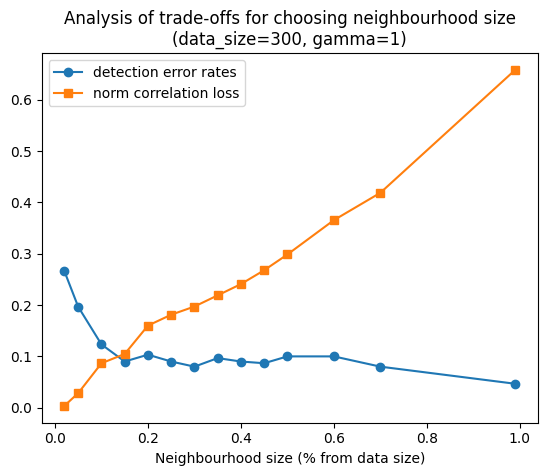

In [22]:
plt.plot(neighbourhood_sizes, error_rates, marker='o', label='detection error rates')
plt.plot(neighbourhood_sizes, (correlation_original-correlation_scores)/correlation_original, marker='s', 
         label='norm correlation loss')
plt.legend()
plt.xlabel('Neighbourhood size (% from data size)')
plt.title('Analysis of trade-offs for choosing neighbourhood size\n(data_size=300, gamma=1)')
plt.grid()

In [ ]:
# save results
results = {'neighbourhood_sizes': neighbourhood_sizes,
          'error_rates': error_rates,
          'norm_correlation_loss': (correlation_original-correlation_scores)/correlation_original}
df_results = pd.DataFrame(results)
df_results.to_csv('NCorrFP_scheme/analysis/neighb_size_analysis.csv', index=False)

Larger neighbourhood leads to less errors. However, larger neighbourhood implies that the correlations are not as preserved as we can see on the orange line; the loss in correlation is almost linear w.r.t. neighbourhood size -- it grows towards large neighbourhood sizes (eg. the final correlation scores drops to 0.25 from the original 0.71)

In [8]:
# zoom in on the interesting parts at neighbourhood size [2% - 30%]
# error rate as a function of size of neighbourhood/total size
# data size = 300
neighbourhood_sizes = list(np.arange(0.02, 0.30 + 0.04, 0.04))
error_rates = []
correlation_scores = []
for k_rate in neighbourhood_sizes:
    k = int(k_rate*300)
    
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data, correlated_attributes, show_messages=False)
    
    error_rates.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.011 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.006 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.0059 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.007 sec.
Training balltrees in: 0.0061 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0048 sec.
Training balltrees in: 0.008 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.005 sec.
Training balltrees in: 0.004 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0056 sec.
Training balltrees in: 0.006 s

Text(0.5, 1.0, 'Analysis of trade-offs for choosing neighbourhood size\n(data_size=300, gamma=1)')

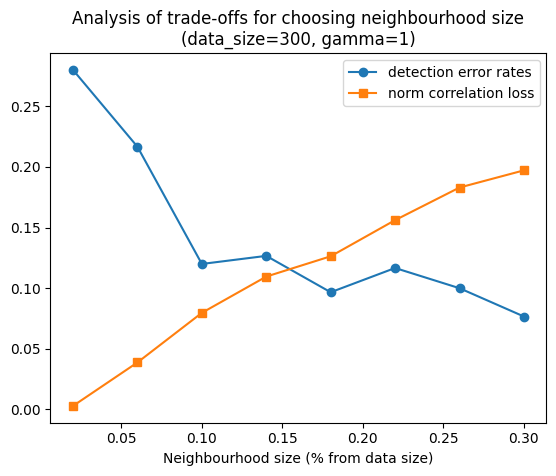

In [11]:
plt.plot(neighbourhood_sizes, error_rates, marker='o', label='detection error rates')
plt.plot(neighbourhood_sizes, (correlation_original-correlation_scores)/correlation_original, marker='s', 
         label='norm correlation loss')
plt.legend()
plt.xlabel('Neighbourhood size (% from data size)')
plt.title('Analysis of trade-offs for choosing neighbourhood size\n(data_size=300, gamma=1)')
plt.grid()

In [ ]:
# save results
results = {'neighbourhood_sizes': neighbourhood_sizes,
          'error_rates': error_rates,
          'norm_correlation_loss': (correlation_original-correlation_scores)/correlation_original}
df_results = pd.DataFrame(results)
df_results.to_csv('NCorrFP_scheme/analysis/neighb_size_analysis_zoomin.csv', index=False)

In [43]:
# further data sizes
data_1000 = "NCorrFP_scheme/test/test_data/synthetic_1000_3_continuous.csv"
dataset_1000 = pd.read_csv(data_1000)
correlation_original_1000 = dataset_1000['X'].corr(dataset_1000['Y'])

data_3000 = "NCorrFP_scheme/test/test_data/synthetic_3000_3_continuous.csv"
dataset_3000 = pd.read_csv(data_3000)
correlation_original_3000 = dataset_3000['X'].corr(dataset_3000['Y'])

data_10000 = "NCorrFP_scheme/test/test_data/synthetic_10000_3_continuous.csv"
dataset_10000 = pd.read_csv(data_10000)
correlation_original_10000 = dataset_10000['X'].corr(dataset_10000['Y'])

data_30000 = "NCorrFP_scheme/test/test_data/synthetic_30000_3_continuous.csv"
dataset_30000 = pd.read_csv(data_30000)
correlation_original_30000 = dataset_30000['X'].corr(dataset_30000['Y'])

In [22]:
neighbourhood_sizes = list(np.arange(0.02, 0.30 + 0.04, 0.04))
error_rates_1000 = []
correlation_scores_1000 = []

error_rates_3000 = []
correlation_scores_3000 = []

error_rates_10000 = []
correlation_scores_10000 = []

error_rates_30000 = []
correlation_scores_30000 = []

for k_rate in neighbourhood_sizes:  
    # data size 1000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*1000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_1000, correlated_attributes, show_messages=False)
    
    error_rates_1000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_1000.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 3000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*3000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_3000, correlated_attributes, show_messages=False)
    
    error_rates_3000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_3000.append(fp_data['X'].corr(fp_data['Y']))
    
    if k_rate <= 0.20:
        # data size 10 000
        scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*10000))
        scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
        scheme.eval(data_10000, correlated_attributes, show_messages=False)

        error_rates_10000.append(scheme.error_rate())

        fp_data = scheme.fingerprinted_data
        correlation_scores_10000.append(fp_data['X'].corr(fp_data['Y']))
        
    if k_rate <= 0.06:
        # data size 30000
        scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*30000))
        scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
        scheme.eval(data_30000, correlated_attributes, show_messages=False)

        error_rates_30000.append(scheme.error_rate())

        fp_data = scheme.fingerprinted_data
        correlation_scores_30000.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0101 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.008 sec.
Training balltrees in: 0.009 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.007 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.009 sec.
Training balltrees in: 0.0073 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.006 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.008 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0062 sec.
Training balltrees in: 0.005 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0087 sec.
Training balltrees in: 0.013 se

In [52]:
# temp loop
neighbourhood_sizes = list(np.arange(0.02, 0.30 + 0.04, 0.04))

for k_rate in neighbourhood_sizes[-3:-2]:  # TODO: reset to original list and uncomment above lines 
    # data size 10 000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*10000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_10000, correlated_attributes, show_messages=False)

    error_rates_10000.append(scheme.error_rate())

    fp_data = scheme.fingerprinted_data
    correlation_scores_10000.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0214 sec.
Training balltrees in: 0.0184 sec.


In [53]:
error_rates_10000

[0.063, 0.0683, 0.0733, 0.0868, 0.0985, 0.0924]

In [ ]:
# refined results for large data --> looking at smaller neighbourhood percentages 
neighbourhood_sizes_small = list(np.arange(0.002, 0.01, 0.002))
error_rates_10000_small = []
correlation_scores_10000_small = []

error_rates_30000_small = []
correlation_scores_30000_small = []


for k_rate in neighbourhood_sizes_small:
    # data size 10 000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*10000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_10000, correlated_attributes, show_messages=False)
    
    error_rates_10000_small.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_10000_small.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 30000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*30000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_30000, correlated_attributes, show_messages=False)
    
    error_rates_30000_small.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_30000_small.append(fp_data['X'].corr(fp_data['Y']))

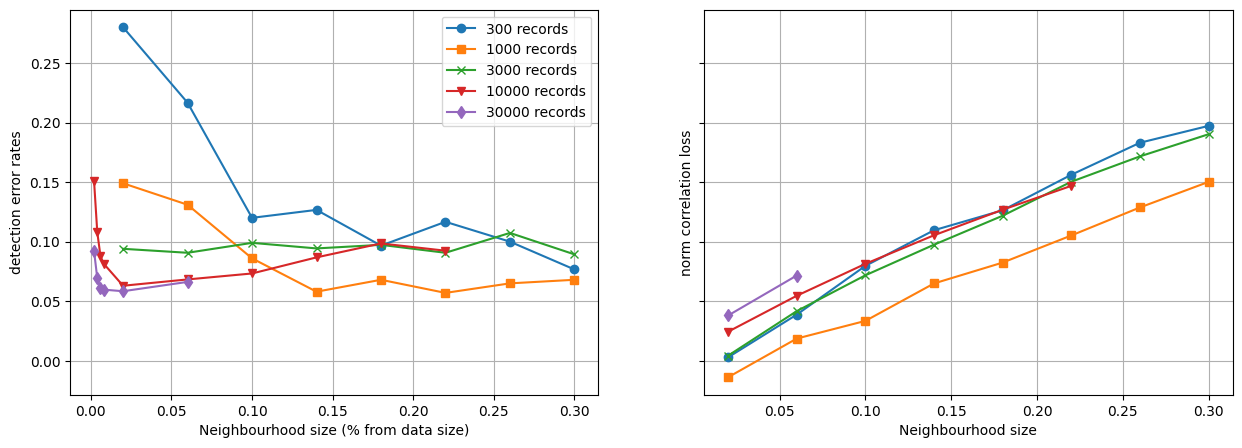

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axs[0].plot(neighbourhood_sizes, error_rates, marker='o', label='300 records')
axs[0].plot(neighbourhood_sizes, error_rates_1000, marker='s', label='1000 records')
axs[0].plot(neighbourhood_sizes, error_rates_3000, marker='x', label='3000 records')
axs[0].plot(neighbourhood_sizes_small+neighbourhood_sizes[:6], error_rates_10000_small+error_rates_10000, marker='v', label='10000 records')
axs[0].plot(neighbourhood_sizes_small+neighbourhood_sizes[:2], error_rates_30000_small+error_rates_30000, marker='d', label='30000 records')
axs[0].legend()
#axs[0].set_title('Analysis of trade-offs for choosing neighbourhood size')
axs[0].set_xlabel('Neighbourhood size (% from data size)')
axs[0].set_ylabel('detection error rates')
axs[0].grid()

axs[1].plot(neighbourhood_sizes, (correlation_original-correlation_scores)/correlation_original, marker='o')
axs[1].plot(neighbourhood_sizes, (correlation_original_1000-correlation_scores_1000)/correlation_original_1000, marker='s')
axs[1].plot(neighbourhood_sizes, (correlation_original_3000-correlation_scores_3000)/correlation_original_3000, marker='x')
axs[1].plot(neighbourhood_sizes[:6], (correlation_original_10000-correlation_scores_10000)/correlation_original_10000, marker='v')
axs[1].plot(neighbourhood_sizes[:2], (correlation_original_30000-correlation_scores_30000)/correlation_original_30000, marker='d')

axs[1].set_xlabel('Neighbourhood size')
axs[1].set_ylabel('norm correlation loss')
axs[1].grid()

Correlation loss shows a linear behaviour w.r.t neighbourhood size ratio. Hence, for keeping the correlation loss as small as possible, we need to look at smaller neighbourhoods, otherwise the the new marks render the dataset generic and the original correlations are lost in the dataset.
The error rates are however behaving differently based on the absolute data size:
- small datasets (up to 1000) - the drop in errors where the rate stabilises is around 10-15% of the data size for k
- medium and large - rather stable rates after the drop around 1-2% with slight increase; hence we should keep k close to 1%

In [87]:
# Create the DataFrame for error rates
df_error_rates = pd.DataFrame({
    'neighbourhood_sizes': neighbourhood_sizes_small + neighbourhood_sizes,
    'error_rates_300': [None]*len(neighbourhood_sizes_small) + error_rates,
    'error_rates_1000': [None]*len(neighbourhood_sizes_small) + error_rates_1000,
    'error_rates_3000': [None]*len(neighbourhood_sizes_small) + error_rates_3000,
    'error_rates_10000': error_rates_10000_small + error_rates_10000 + [None]*2,
    'error_rates_30000': error_rates_10000_small + error_rates_30000 + [None]*6
})

In [94]:
# Create the DataFrame for normalized correlation loss
df_corr_loss = pd.DataFrame({
    'neighbourhood_sizes': neighbourhood_sizes_small + neighbourhood_sizes,
    'corr_loss_300': [None]*len(neighbourhood_sizes_small) + ((correlation_original - correlation_scores) / correlation_original).tolist(),
    'corr_loss_1000': [None]*len(neighbourhood_sizes_small) + ((correlation_original_1000 - correlation_scores_1000) / correlation_original_1000).tolist(),
    'corr_loss_3000': [None]*len(neighbourhood_sizes_small) + ((correlation_original_3000 - correlation_scores_3000) / correlation_original_3000).tolist(),
    'corr_loss_10000': ((correlation_original_10000 - correlation_scores_10000_small) / correlation_original_10000).tolist() + ((correlation_original_10000 - correlation_scores_10000) / correlation_original_10000).tolist() + [None]*2,
    'corr_loss_30000': ((correlation_original_30000 - correlation_scores_30000_small) / correlation_original_30000).tolist() + ((correlation_original_30000 - correlation_scores_30000) / correlation_original_30000).tolist() + [None]*6
})

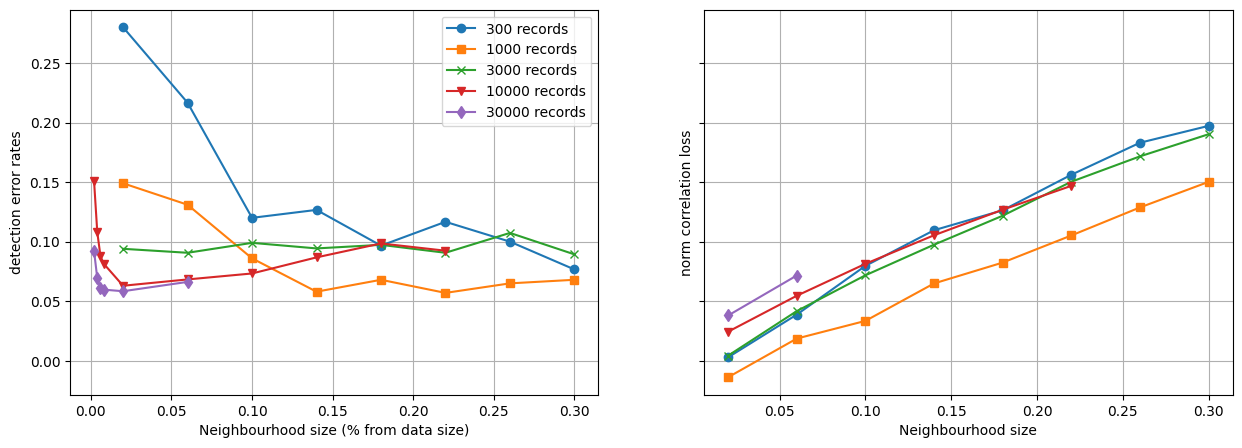

In [95]:
# Save both DataFrames to CSV files
df_error_rates.to_csv('error_rates_plot_data.csv', index=False)
df_corr_loss.to_csv('correlation_loss_plot_data.csv', index=False)

In [116]:
# error rates as a function of gamma
# - fix an optimal neighbourhood size k
# - check different data sizes

gammas = [2, 3, 10]  # [1, 2, 3, 10] 
error_rates_300 = [0.13333333333333333]  # initialisation for gamma=1
correlation_scores_300 = [0.6486833813943642]

#error_rates_1000 = []  # TODO: uncomment
#correlation_scores_1000 = []

#error_rates_3000 = []
#correlation_scores_3000 = []

#error_rates_10000 = []
#correlation_scores_10000 = []

#error_rates_30000 = []
#correlation_scores_30000 = []

for gamma in gammas:  
    # data size 300
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=30)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data, correlated_attributes, show_messages=False)
    
    error_rates_300.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_300.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 1000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=150)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_1000, correlated_attributes, show_messages=False)
    
    error_rates_1000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_1000.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 3000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=60)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_3000, correlated_attributes, show_messages=False)
    
    error_rates_3000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_3000.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 10 000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=100)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_10000, correlated_attributes, show_messages=False)

    error_rates_10000.append(scheme.error_rate())

    fp_data = scheme.fingerprinted_data
    correlation_scores_10000.append(fp_data['X'].corr(fp_data['Y']))
        
    # data size 30000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=300)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_30000, correlated_attributes, show_messages=False)

    error_rates_30000.append(scheme.error_rate())

    fp_data = scheme.fingerprinted_data
    correlation_scores_30000.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.025 sec.
Training balltrees in: 0.0157 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.031 sec.
Training balltrees in: 0.01 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0416 sec.
Training balltrees in: 0.008 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0295 sec.
Training balltrees in: 0.0317 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.1151 sec.
Training balltrees in: 0.0555 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.011 sec.
Training balltrees in: 0.013 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.011 sec.
Training balltrees in: 0.008 sec.

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0249 sec.
Training balltrees in: 0.019

In [117]:
error_rates_30000

[0.061733333333333335,
 0.04355620476727973,
 0.04202350129456284,
 0.03159663865546219]